there are two types of recommender systems :  

1. ### content based
(it means that the recommendation will be done based on the content that the person is currently watching)


2. ### collaborative filtering based
(let us assume there are two persons A and B, and based on their previous data, their similarity score is 0.9 and the content that A is willing to watch is also suggested to B .   and the reels that are liked by your friends are suggested to you also many times.)

3. ### hybrid
(the recommender systems in the youtube and instagram are(social media) are using Hybrid. )



Now we are using the content based recommender system for this project:

Project Flow:

Data----------->Preprocessing--------------->Model---------------->Website----------------->Deploy..

In [6]:
import pandas as pd
import numpy as np
import sklearn

In [7]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [8]:
credits.head()


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
credits.head(1)['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [10]:
movies.shape
credits.shape

(4803, 4)

In [11]:
movies=movies.merge(credits,on='title')

In [12]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [13]:
#genres
#id
#keywords
#title
#overview
#cast
#crew
movies=movies[['genres','id','keywords','title','overview','cast','crew']]
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [14]:
movies.isnull().sum()

genres      0
id          0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [16]:
# the overview column has three nulls and you can drop them

movies.dropna(inplace=True)

In [17]:
movies.isnull().sum()

genres      0
id          0
keywords    0
title       0
overview    0
cast        0
crew        0
dtype: int64

In [18]:
# check for the duplicated

movies.duplicated().sum()

0

In [19]:
movies['id'][0]

19995

In [22]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [31]:
# '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]' should be converted into :
#['Action','Adventure','Fantasy','ScienceFiction']

In [35]:
import ast
#ast.literal_eval('y9h')     #  this funciton converts only the input strings that's output is not a string again........

In [38]:
# the output that we are getting is a string so we are using literal eval function and to convert into the above format in  [33]:

def convert(obj):
    l=[]
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l
x=convert(movies.iloc[0].genres)
print(x)

['Action', 'Adventure', 'Fantasy', 'Science Fiction']


In [40]:
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [42]:
movies['genres']=movies['genres'].apply(convert)        # to apply function over complete column
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [44]:
# same thing on keywords:

movies['keywords']=movies['keywords'].apply(convert)

In [45]:
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [48]:
def convert3(obj): #   we need only first three actors in the cast list
    l=[]
    count=0
    for i in ast.literal_eval(obj):
        if count<3:
            l.append(i['name'])
            count+=1
        else:
            break
    return l

In [50]:
movies['cast']=movies['cast'].apply(convert3)

In [51]:
#  in the crew we are just fetching the director

def fetch_director(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            l.append(i['name'])
            break
    return l

In [52]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [53]:
movies.head(2)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [54]:
# we are also converting the overview of the movies into a list

movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [55]:
movies.head(2)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [56]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ",'')  for i in x])


# the replace function replaces whatever you want to replace inside the string (it will not replace the whole string,
                                                                              # but it will replace the literals in the string)
# we are removing the spaces that are present in the words which will disturb us when we are gonna create the tags

In [57]:
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ",'')  for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ",'')  for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ",'')  for i in x])


In [58]:
movies.head(2)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


In [59]:
#  concatenation of the columns into a single column now: 

movies['tags']= movies['overview']+movies['genres']+movies['keywords']+ movies['cast']+movies['crew']

In [60]:
movies.head(2)

,genres,id,keywords,title,overview,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."


In [61]:
newdf=movies[['id','title','tags']]

In [62]:
newdf['tags'] = newdf['tags'].apply(lambda x : ' '.join(x))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15048\219241253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['tags'] = newdf['tags'].apply(lambda x : ' '.join(x))


In [63]:
newdf['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [64]:
# convert all the words of the tags now small case ( Recommended ):

newdf['tags']=newdf['tags'].apply(lambda x: x.lower())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15048\233759507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['tags']=newdf['tags'].apply(lambda x: x.lower())


In [65]:
# All the preprocessing work of the data is done and now we have to convert the entire data into a vector format(vectorization):
# so that each movie is converted into one vector and the nearest vectors to the current movie are suggested to the watcher:

#  the movie is converted into a vector as we choose the important words from combining all the tags of all the movies(w1,w2,w3,w4,w5,w6,...)
#                         and word by word we check the occurance of each word how many times  (w1,w2,w3,w4,w5.....)
#                                                                                           m1 (1,2,1,4,2,....) this is the vector of the movie 1


#we are gonna remove the 'stop words' in the  tags column in each movie .
#(the stop words are the words that help in the formation of the sentences in the english and don't contribute to the
                                        #actual meaning of the sentence like :  are, the , of , is  etc.......)

In [68]:
# a library of nlp

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

cv.fit_transform(newdf['tags']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
cv.fit_transform(newdf['tags']).toarray().shape

(4806, 5000)

In [70]:
vectors=cv.fit_transform(newdf['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
#first movie avatar
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [73]:
len(cv.get_feature_names_out())

5000

In [74]:
#  the features that are extracted might have repeated values like :
#              ['love','loves','actors','actor'] like this  to be converted into ['love','love','actor','actor']
#    so we are introducing a new library to solve this:  from natural language processing (nltk)

In [75]:
!pip install nltk

In [76]:
import nltk

In [77]:
# will do stemming(solving the above problem)

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [78]:
ps.stem('acts')

'act'

In [79]:
ps.stem('actors')

'actor'

In [80]:
#we are now directly stemming the newdf['tags'] column                    (before count vectorizer)

In [81]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))

    return ' '.join(y)

In [82]:
newdf['tags'] = newdf['tags'].apply(stem)     # and now we run all above code: from count vectorizer

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15048\2924543505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['tags'] = newdf['tags'].apply(stem)     # and now we run all above code: from count vectorizer


### now the only work left is to calculate the distance between the movies vectors 
### now we are not calculating the eucledian distance, instead we are gonna calculate cosine distance:

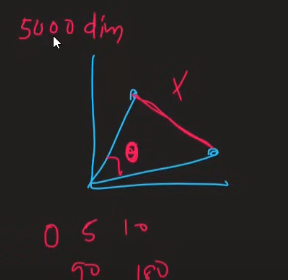       in high dimensionality it is recommended to use cosine distance only. the eucledian distance fails...............

In [84]:
# to do the above:

from sklearn.metrics.pairwise import cosine_similarity

In [87]:
cosine_similarity(vectors)       #by observation we are getting a symmetric matrix

array([[1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
        0.        ],
       [0.08964215, 1.        , 0.0625    , ..., 0.02635231, 0.        ,
        0.        ],
       [0.05976143, 0.0625    , 1.        , ..., 0.02635231, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02635231, ..., 1.        , 0.0745356 ,
        0.04836508],
       [0.02817181, 0.        , 0.        , ..., 0.0745356 , 1.        ,
        0.05407381],
       [0.        , 0.        , 0.        , ..., 0.04836508, 0.05407381,
        1.        ]])

In [100]:
# storing in a similarity variable
similarity=cosine_similarity(vectors)

In [101]:
newdf[newdf['title']== 'Avatar'].index[0]    # to get the index of the movie

0

In [102]:
# actual recommendation function

def recommend(movie):
    movie_index=newdf[newdf['title'] == movie].index[0]
    distances=similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),key=lambda x: x[1],reverse=True)[1:6] # recommending 5 movies( 0 is not included because, it is the distance with the same movie)

    for i in movies_list:# each time a tuple is obtained
          print(newdf.iloc[i[0]].title)

In [104]:
recommend("Avatar")

Titan A.E.
Small Soldiers
Independence Day
Ender's Game
Aliens vs Predator: Requiem


# website:

This is useful for:    (pickle)

Saving machine learning models to disk.

Storing program state across sessions.

Transferring Python objects between programs or systems.

In [191]:
#  now we have to send our data set and model to the website:
import pickle

In [193]:
pickle.dump(newdf,open('movies.pkl','wb'))   # since there is an error occuring,
#                     we are not dumping a dataframe and we are dumping a dictionary.........

In [186]:
pickle.dump(newdf.to_dict(),open('movie_dict.pkl','wb'))

In [191]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [7]:
pd.__version__

'2.2.2'

In [9]:
np.__version__

'1.26.4'

In [19]:
sklearn.__version__

'1.5.1'

In [153]:
# streamlit code:

# import streamlit as st
# import pandas as pd
# import numpy as np
# import pickle
# import requests

# def fetch_poster(movie_id):
#     response=requests.get('https://api.themoviedb.org/3/movie/{}?api_key=583e19c32a45c066ca7c5a994bef746a&language=en-US'.format(movie_id))
#     data=response.json()
#     return "https://image.tmdb.org/t/p/w500/"  +  data['poster_path']

# def recommend(movie):
#     movie_index = movies[movies['title'] == movie].index[0]
#     distances = similarity[movie_index]
#     movies_list = sorted(list(enumerate(distances)), key=lambda x: x[1], reverse=True)[1:6]

#     recommend_movies = []
#     recommended_movie_posters = []
#     for i in movies_list:
#         movie_id=movies.iloc[i[0]].id

#         recommend_movies.append(movies.iloc[i[0]].title)
#         recommended_movie_posters.append(fetch_poster(movie_id))
#     return recommend_movies, recommended_movie_posters

# movies_dict=pickle.load(open("movie_dict.pkl", "rb"))
# movies=pd.DataFrame(movies_dict)
# similarity= pickle.load(open("similarity.pkl", "rb"))
# st.title('Movie Recommender')


# selected_movie = st.selectbox('Select Movie', movies['title'].values)

# if st.button('Recommend Movie'):
#     names,posters=recommend(selected_movie)

#     col1, col2, col3, col4, col5 = st.columns(5)
#     with col1:
#         st.text(names[0])
#         st.image(posters[0])

#     with col2:
#         st.text(names[1])
#         st.image(posters[1])

#     with col3:
#         st.text(names[2])
#         st.image(posters[2])

#     with col4:
#         st.text(names[3])
#         st.image(posters[3])

#     with col5:
#         st.text(names[4])
#         st.image(posters[4])

